# Exploring Socioeconomic and Regional Factors and Their Influence on U.S. High School Educational Outcomes

## Introduction
This project used data science methodology to explore how socioeconomic factors and regional differences impact educational opportunities in U.S. highschools. Specifically, it used 5 numerical measures of socioeconomic indicators (Unemployment Rate, Percent Adults with College Degree, Percent Children in Married Couples Family, Median Household Income, and Percent Eligible for Free and Reduced Lunch), with an additional look at regional differences, to determine their value in predicting average ACT scores. The project used data and average ACT scores from EdGap.org and basic school information from the National Center for Education Statistics. 

## Load Necessary Libraries and Data
The variable edgap is was used for data frame obtained from EdGap.org. The variable school_information was used for the dataframe obtained from the National Center for Education Statistics. The following libraries were imported and used.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.impute import SimpleImputer
import plotly.offline as po
import plotly.graph_objs as pg
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [236]:
edgap = pd.read_excel("https://raw.githubusercontent.com/elarson5/DATA-5100-education/main/data/EdGap_data.xlsx", 
                      dtype={"NCESSCH School ID": object})
school_information = pd.read_csv(
r"C:\Users\emily\OneDrive\Seattle University\DATA 51000\ccd_sch_029_1617_w_1a_11212017.csv", 
encoding='unicode_escape')

C:\Users\emily\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\emily\AppData\Local\Temp\ipykernel_14812\1413341411.py:3: DtypeWarning:

Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.



## Explore the contents of the data
The functions .head() and .info() were used to verify the columns present in each data frame and check data types, size of data drame, and numbers of potential missing values.

In [237]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [238]:
pd.set_option("display.max_columns", None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [239]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [240]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

The data frame EdGap has 7986 entries and 7 columns: NCESSCH School ID, CT Unemployment Rate, CT Pct Adults with College Degree, CT,  Pct Childre In Married Couple Family, CT Median Household Income, School ACT average (or equivalent, if SAT score), School Pct Free and Reduced Lunch. There are 7986 entries but the Non-Null Count varies per each socioeconomic predictor. The dataframe school_information is large with 65 columns of varying identifying information about the schools and 102,183 rows of data. 

## Determine suitability of data for answering the question
Before progressing further into data cleaning and then analysis, some preliminary analysis was performed to determine if the data is suitable to answer the queston. This was done with pairplot, which will created a grid of scatterplots and histograms to visually explore the relationships between pairs of the various variables in the data frames. The following code creates a customized pairplot with regression lines. The resulting graphs indicate there is some observable relationship between socioeconomic variables and average ACT scores. There are some out of range ACT scores and percent lunch values. In the next stage the data will be cleaned and prepared for analysis.

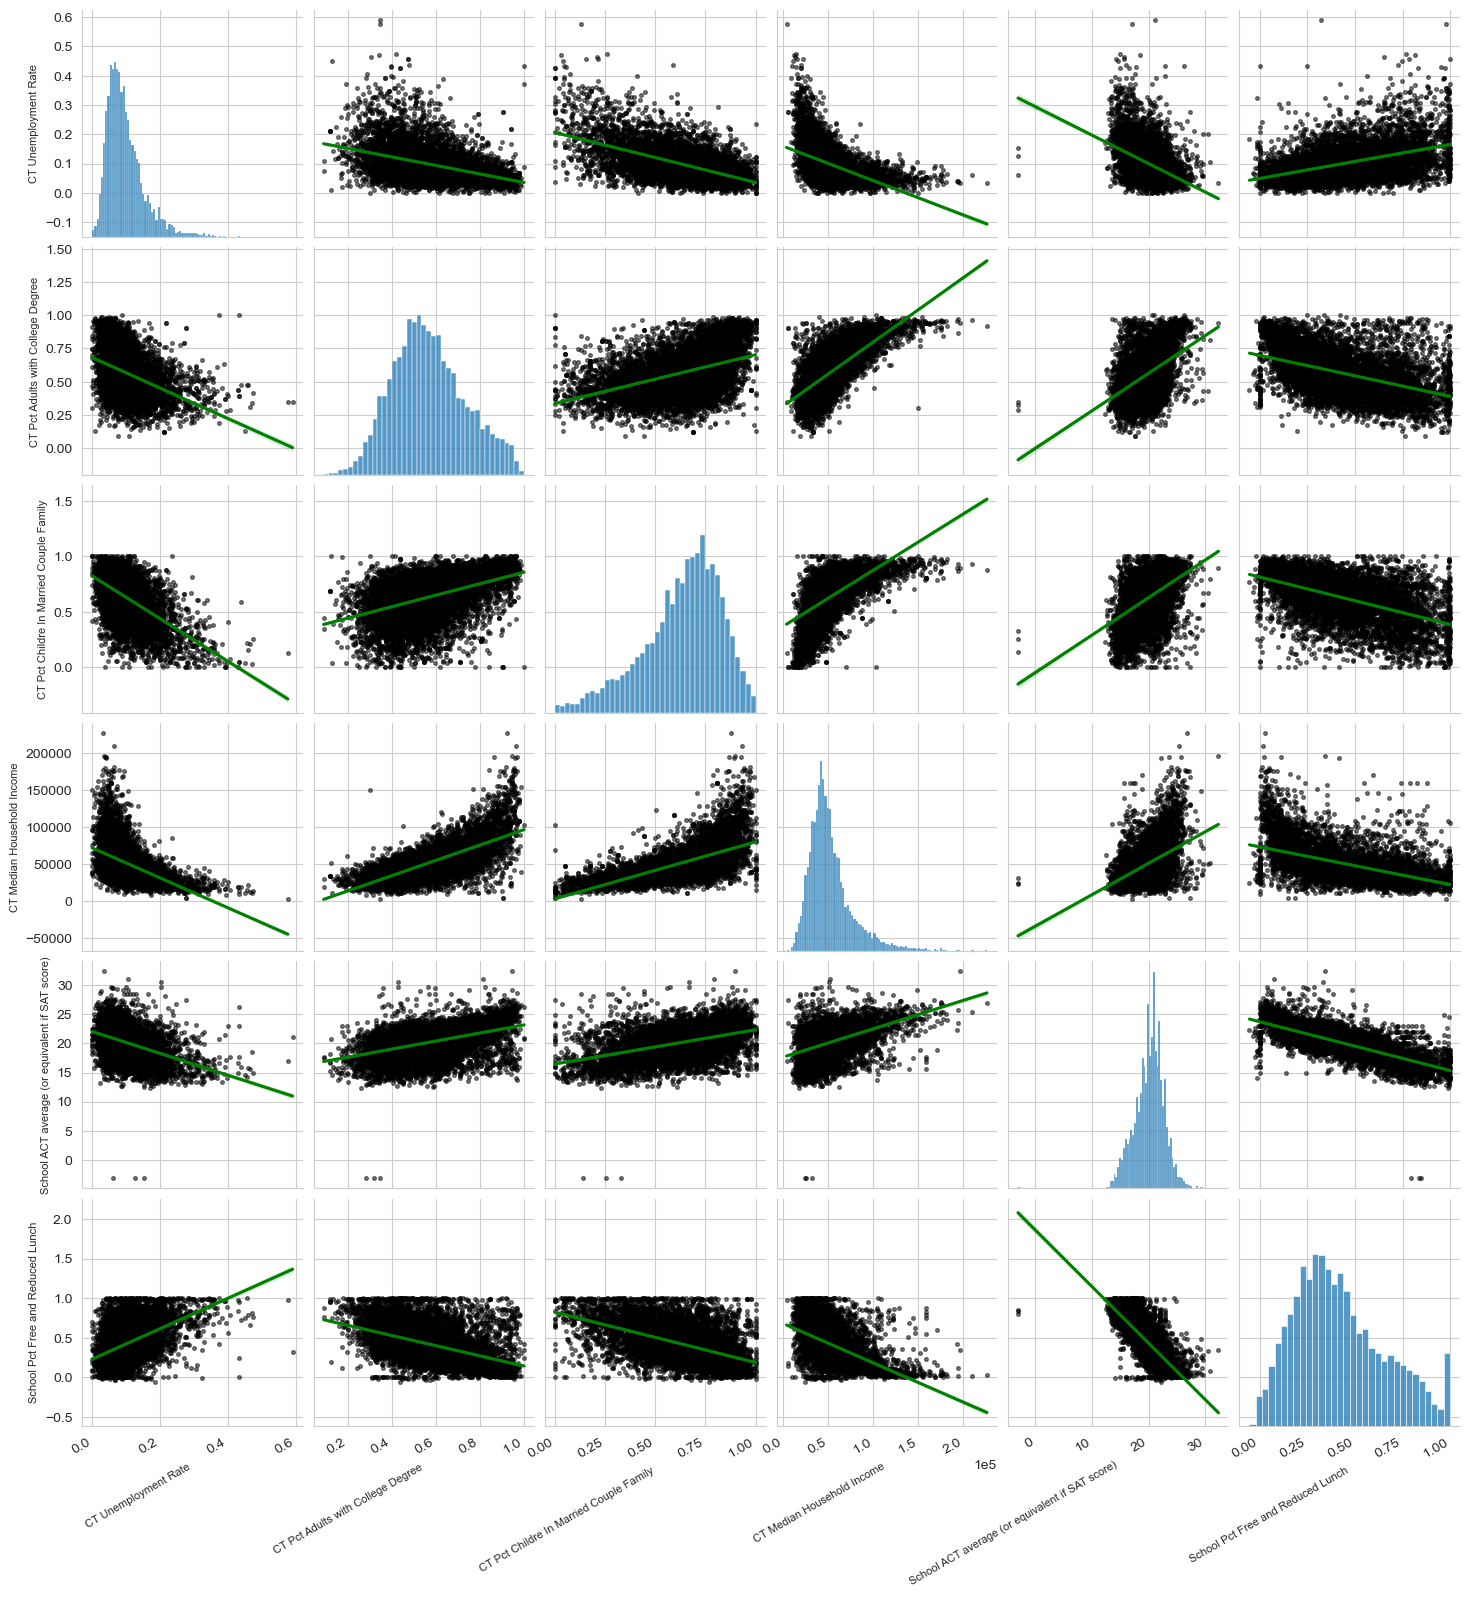

In [241]:
fig= sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={"line_kws": {"color": "blue"}, "scatter_kws": {"alpha":0.5, "color": "k", "s": 7},},)

for ax in fig.axes.flat:
    if ax.get_xlabel() == "CT Median Household Income":
        ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0)) 
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha="right") 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) 

    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.show()

## Data Preparation
Select relevant subsets of data and rename columns.

In [242]:
school_information = school_information[
    ["NCESSCH", "LSTATE", "SCH_TYPE_TEXT", "LEVEL"]]
school_information.head()

,NCESSCH,LSTATE,SCH_TYPE_TEXT,LEVEL
0,1.000020e+10,AL,Alternative School,High
1,1.000020e+10,AL,Alternative School,High
2,1.000020e+10,AL,Alternative School,High
3,1.000020e+10,AL,Alternative School,High
4,1.000020e+10,AL,Alternative School,High


In [243]:
edgap= edgap.rename(
    columns= {
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [244]:
school_information = school_information.rename(
    columns={
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
    }
)

Join the data frames using the identify of school id as the key. In the edGap dataset the data is an object and in the school information set the data in a float64. Cast the id column in the school_infromation DataFrame as an object to make them equivalent

In [245]:
school_information["id"]= school_information["id"].astype("object")

Now join the data frames by using .merge(), use edgap as the left and then merging with the school_information data frame using a left join on the ID as the key. The resulting dataframe will be called df.

In [246]:
df = edgap.merge(
    school_information,
    how= "left",
    on= "id"
)

At this stage, we need to implement quality control and check for any out of range values in a predictor variable. This can be done by using .describe(). 

In [247]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


This created a table of descriptive statistics. This table shows some out of range values for average_act (which shows a minimun value of -3.07) and percent_lunch (which shows a negative value of -0.05). These out of range values can be set to NaN by using .np.nan. The values are being set to NaN instead of being removed because we want to keep other associated information for the schools.

In [248]:
df.loc[df["percent_lunch"]<0, "percent_lunch"] = np.nan

In [249]:
df.loc[df["average_act"]<1, "average_act"] = np.nan

The values of other schools can also be observed by using .value_counts().

In [250]:
df["school_type"].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [251]:
df["school_level"].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

For school level, since the project is looking at ACT scores we are only interested in keeping values for high schools. The code below will keep only the 7,230 high school values and drop the 668 other values for other schools types. 

In [252]:
df = df.loc[df["school_level"] =="High"]

Next, we will want to check for the sum of duplicated rows by using .duplicated().sum(). The output is 0, meaning there are 0 duplicated rows that need to be dropped.

In [253]:
df.duplicated().sum()

np.int64(0)

At this stage, we want to identify the number of missing values for each predictor variable. The code below will output the number of missing values. We observe there are 12 missing for rate_unemployment, 11 for percent_college, 20 for percent_married, 16 for median_income, 3 for average_act, and 20 for percent_lunch.

In [254]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
state,0
school_type,0
school_level,0


Although there are 0 missing values for states, to have a complete picture we want to know how many states we have data from. The function value_counts() will show the count of values for each value type, showing which states are included in the data frame. The function .nunique() will then count the total number of states that the dataset has data for.

In [255]:
df["state"].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [256]:
df["state"].nunique()

20

The output shows there is only data for 20 states, so we know we are missing many states from the data frame. It is difficult to visualize this by only viewing the count or by the NaN values in the set. We can use a plot to visualize the missing states.

In [257]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)
data= dict(
    type="choropleth",
    locations= df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x= pg.Figure(data=[data], layout= layout)

po.iplot(x)

We will respond to the missing state values by dropping the rows where the ACT score is missing because this is the response variable. 

In [258]:
df= df.dropna(subset=["average_act"])

At this point, a regional variable will be created by placing the states contained within the dataset into different regions.

In [259]:
def assign_region(state):
    northeast = ['PA', 'NJ', 'NY', 'MA', 'DE']
    midwest = ['OH', 'IL', 'MI', 'WI', 'MO', 'IN']
    south = ['TX', 'NC', 'FL', 'GA', 'TN', 'LA', 'KY']
    west = ['WA', 'WY']
    
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [260]:
df['region'] = df['state'].apply(assign_region)

In [261]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [262]:
print(df[['region_Northeast', 'region_South', 'region_West']].head())

   region_Northeast  region_South  region_West
0              True         False        False
1              True         False        False
2              True         False        False
3              True         False        False
4              True         False        False


In [263]:
region_cols = ['region_Northeast', 'region_South', 'region_West']
df[region_cols] = df[region_cols].astype(int)


In [264]:
df['region'] = df[['region_Northeast', 'region_South', 'region_West']].idxmax(axis=1).str.replace('region_', '')

In [265]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,state,school_type,school_level,region_Northeast,region_South,region_West,region
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,DE,Regular School,High,1,0,0,Northeast
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,DE,Regular School,High,1,0,0,Northeast
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,DE,Regular School,High,1,0,0,Northeast
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,DE,Regular School,High,1,0,0,Northeast
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,DE,Regular School,High,1,0,0,Northeast


A regional dummy variable was created that identifies as 1 if the value falls in the region and 0 if it does not. This is also identified under the newly created column "region". 

## Data Imputation
The project then took information from the dataset and replaced NaNs with values that could be estimated from the dataset. This began by defining predictor variables. Then an iterative imputer was used to replace missing values in the columns that correspond to predictor variables in the study. Then the imputer was defined to create an object of this type. Now will fit imputer using the numerical predictor values. Then, fit the imputer. In this process we are learning the relationship between columns and then applying the transform method to replace values. Lastly, impute the missing values. At this point, we are taking the imputer that has been fit to the data and then applying a transform on those column to enable us to replace NaN values.

In [266]:
predictor_variables = [
    "rate_unemployment",
    "percent_college",
    "percent_married",
    "median_income",
    "percent_lunch",
    "state"
]

In [267]:
imputer = IterativeImputer()

In [268]:
numerical_predictors = df[predictor_variables].select_dtypes(include="number").columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


In [269]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [270]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

The imputation has been complete. Now we want to confirm we have replaced the values calling the same function as before ``.isna().sum()``. The output tells us that there are no missing values. The imputation method worked. Also use .info to view the information about the data frame after completing the numerious actions of renaming columns, adding columns, dropping rows, and imputing missing values.

In [271]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
state,0
school_type,0
school_level,0


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7227 entries, 0 to 7985
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7227 non-null   object 
 1   rate_unemployment  7227 non-null   float64
 2   percent_college    7227 non-null   float64
 3   percent_married    7227 non-null   float64
 4   median_income      7227 non-null   float64
 5   average_act        7227 non-null   float64
 6   percent_lunch      7227 non-null   float64
 7   state              7227 non-null   object 
 8   school_type        7227 non-null   object 
 9   school_level       7227 non-null   object 
 10  region_Northeast   7227 non-null   int64  
 11  region_South       7227 non-null   int64  
 12  region_West        7227 non-null   int64  
 13  region             7227 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 846.9+ KB


Complete the data preparation by exporting the clean data set.

In [273]:
df.to_csv(
    "education_clean_final.csv",
    encoding= "utf-8-sig",
    index=False
)

# Analysis

In the analysis section, each numerical predictor was evaluated individually. A single input regression was fit using STATS model’s ordinary least squares function, and then assessed for statistical significance, ability to predict average ACT scores, and error of the model. There was focus on the magnitude of each coefficient. Each numerical predictor was also assessed if it needed to be transformed. This was done by plotting the residuals and visually examining to see if they form a perfect cloud shape or other discernable shape. For the regional variables, a boxplot was generated to visually observe the range of average ACT scores per region. 

## Free or Reduced Price Lunch 
The first predictor variable that was reviewed was free or reduced price lunch. The data was plotted with a regression line to provide an initial examination of the relationship between free or reduced price lunch and average ACT score. The plot shows there is a negative relationship between free or reduced price lunch; as the percent that qualify for free or reduced price lunch increases, the average ACT score decreases.

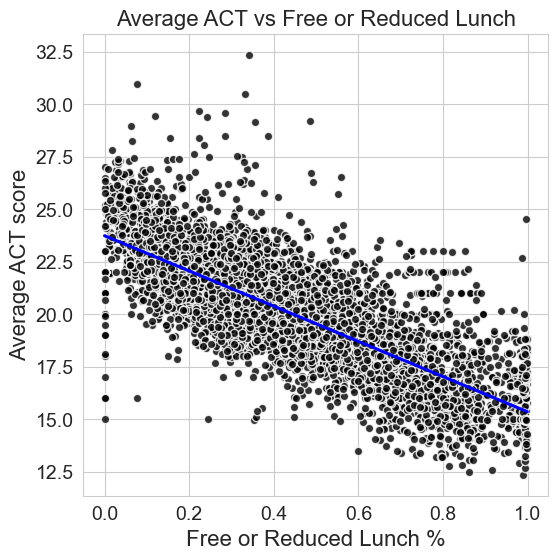

In [350]:
plt.figure(figsize=(6,6))
sns.regplot(data=df,
            x="percent_lunch",
            y="average_act",
            color="blue",
            ci=False,
            scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})
plt.xlabel("Free or Reduced Lunch %", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)
plt.title("Average ACT vs Free or Reduced Lunch", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [275]:
model_percent_lunch= smf.ols(formula="average_act ~ percent_lunch", data=df).fit()
print(model_percent_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:41   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

The R-squared is 0.614, meaning that about 61.4% of the variation in the average ACT scores is explained by the variable percent_lunch. The intercept is 23.74, which tells us that when the when there are no students in the school with free or reduced lunch, the expected average ACT score is 23.74. The coefficient on percent_lunch is -8.39. For every 1 unit increase in percent_lunch, the average ACT score decreases by about 8.39. Lastly, the p-value for percent_lunch is 0, indicating it is statistically significant. The RMSE was then computed, which computes predictions of the model for the values of median income that were in the dataset where we fit the model.

In [276]:
y_hat2= model_percent_lunch.predict()

In [277]:
np.sqrt(mean_squared_error(df["average_act"], y_hat2)).round(3)

np.float64(1.559)

The mean absolute error was then computed. This will explain, on average, what was the error between the regression model and the actual values for the ACT score.

In [278]:
mean_absolute_error(df["average_act"], y_hat2)

1.16899393743884

The fit of the model was then assessed using a graphical method. 

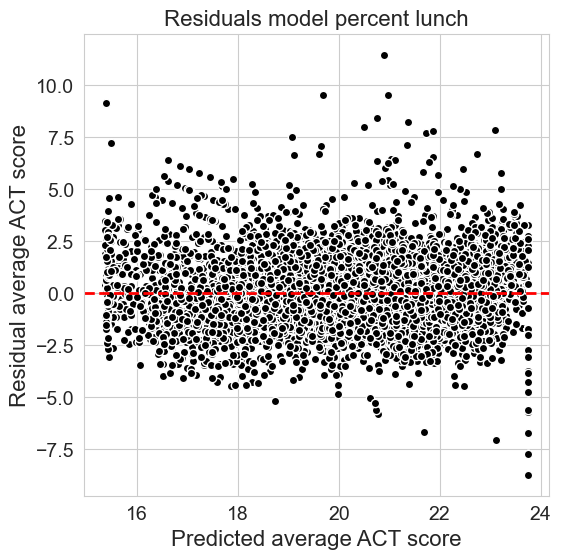

In [279]:
plt.figure(figsize=(6,6))

plt.plot(y_hat2, model_percent_lunch.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)
plt.title("Residuals model percent lunch", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The scatterplot is disbursed and somewhat forms a cloud shape. It was decided to explore a transformation by squaring the variable percent_lunch.

In [281]:
model_percent_lunch2= smf.ols(
    formula="average_act ~ percent_lunch + I(percent_lunch**2)",
    data=df).fit()
print(model_percent_lunch2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     5788.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:43   Log-Likelihood:                -13444.
No. Observations:                7227   AIC:                         2.689e+04
Df Residuals:                    7224   BIC:                         2.692e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                24.03

A quadratic linear regression model for percent_lunch was then fit by adding a squared version of percent_lunch. The R-squared value is 0.616, which is just barely higher than the previous model. Both variables percent_lunch and percent_lunch squared have p-values of 0 and are statistically significant. The coefficient for percent_lunch also has a larger magnitude than what was observed with the original model. The magnitude went from -8.39 to -10.02. The percent_lunch squared variable has a coefficient of 1.7, which is a much smaller magnitude.

In [282]:
model_percent_lunch2.pvalues

Intercept                 0.000000e+00
percent_lunch            1.867174e-246
I(percent_lunch ** 2)     4.256607e-09
dtype: float64

The model's significance was then tested using p-values. The resulting p-values were 0, indicating the model was significant. 

In [283]:
mean_absolute_error(df["average_act"], model_percent_lunch2.predict())

1.1651018457233144

In [284]:
mean_absolute_error(df["average_act"], model_percent_lunch.predict())

1.16899393743884

The model's accuracy was then assessed by computing the mean absolute error. The mean absolute error for the quadratic linear regression model was 1.165. The mean absolute error for the original model was 1.169. The mean absolute error for the quadratic linear regression model is not much different from the simple linear regression model. For this reason, it was decided to use the linear regression model because the quadratic model would not provide a better fit.

## Unemployment Rate

The variable rate_unemployment was then plotted and fit with a regression line. There was a slight negative trend. The data was clustered to the left, indicating there might be a right-skewed distribution. 

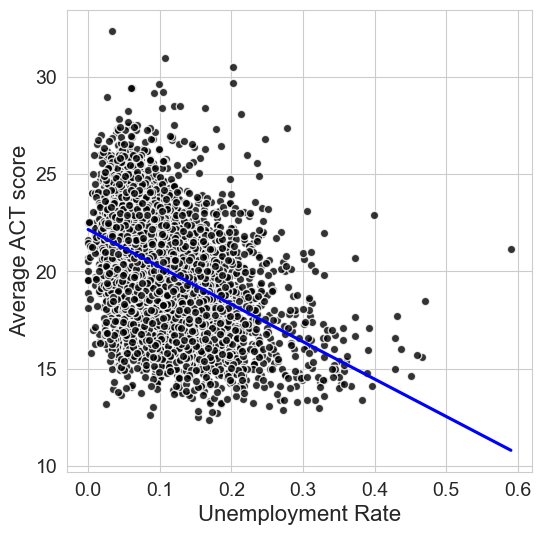

In [285]:
plt.figure(figsize=(6,6))
sns.regplot(data=df,
            x="rate_unemployment",
            y="average_act",
            color="blue",
            ci=False,
            scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})
plt.xlabel("Unemployment Rate", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [286]:
model_rate_unemployment= smf.ols(formula="average_act ~ rate_unemployment", data=df).fit()
print(model_rate_unemployment.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:44   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1512      0.05

The summary for rate_unemployment resulted in a relatively low R-squared of 0.188. The coefficient for rate_unemployent was -19.21, which means the model is saying for every one unit increase of the unemployment rate, the average ACT score decreases by 19.21. This seemed to be a rather high magnitude on the variable given the range of the ACT score is 1-36. The p-value is 0, indicating the variable is statistically significant. 

The RMSE was then computed and yielded 2.26. This means that the model's predicted ACT scores are about 2.26 points off from the actual scores. The mean absolute error was 1.74, which is relatively small. Average ACT scores can be predicted from this model. 

In [287]:
y_hat3= model_rate_unemployment.predict()

In [288]:
np.sqrt(mean_squared_error(df["average_act"], y_hat3)).round(3)

np.float64(2.261)

In [289]:
mean_absolute_error(df["average_act"], y_hat3)

1.7421893796735066

The model's fit was then evaluated graphically. In the plot, the residuals are clustered to the right, indiciating possible heteroscedasticity. There is no obvious curve indicating it is polynomial. 

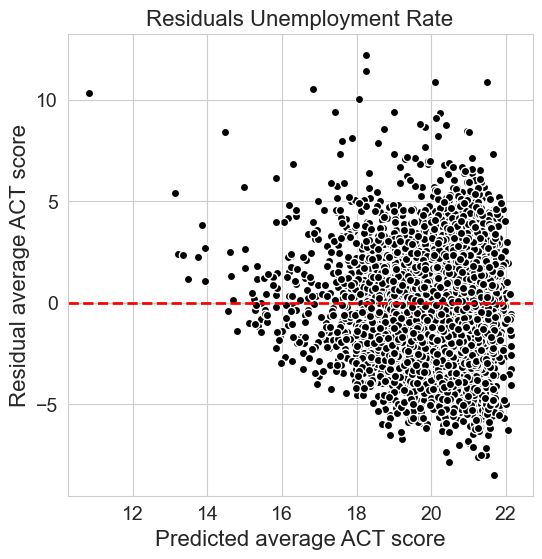

In [290]:
plt.figure(figsize=(6,6))

plt.plot(y_hat3, model_rate_unemployment.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)
plt.title("Residuals Unemployment Rate", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

Because the clustering of the residuals indicate there may be heteroscedasticity, a logarithmic transformation of the rate_unemployment variable was evalauted. The following code transformed the variable rate_unemployed. The value 0.0001 was added to avoid running into log(0), which is undefined.  

In [291]:
df['log_unemployment'] = np.log(df['rate_unemployment'] + 0.001)  

x = sm.add_constant(df['log_unemployment'])  
y = df['average_act']

model_log = sm.OLS(y, x).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     1342.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          1.31e-269
Time:                        08:19:44   Log-Likelihood:                -16285.
No. Observations:                7227   AIC:                         3.257e+04
Df Residuals:                    7225   BIC:                         3.259e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.1278      0.117  

The new regression model for log_unemployment had an R-squared of 0.157, which is relatively small. The variable log_unemployment had a coefficient of -1.678 indicating a negative relationship with average ACT. The variable had a p-value of 0 and was statistically significnat.

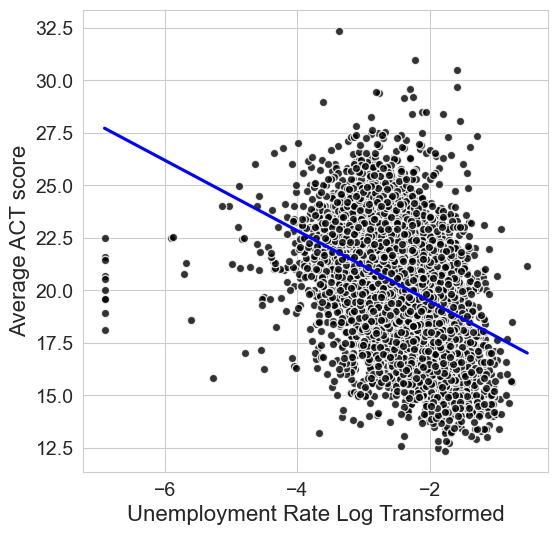

In [292]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x="log_unemployment",
            y="average_act",
            color="blue",
            ci=False,
            scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})
plt.xlabel("Unemployment Rate Log Transformed", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

The RMSE was then computed. The new RMSE was 2.30, meaning on average the model's predicted scores were 2.30 off from the actual scores.

In [293]:
y_hat33= model_log.predict()

In [294]:
np.sqrt(mean_squared_error(df["average_act"], y_hat33)).round(3)

np.float64(2.303)

In [295]:
mean_absolute_error(df["average_act"], y_hat33)

1.784490576727166

The fit of the model was then evaluated graphically.

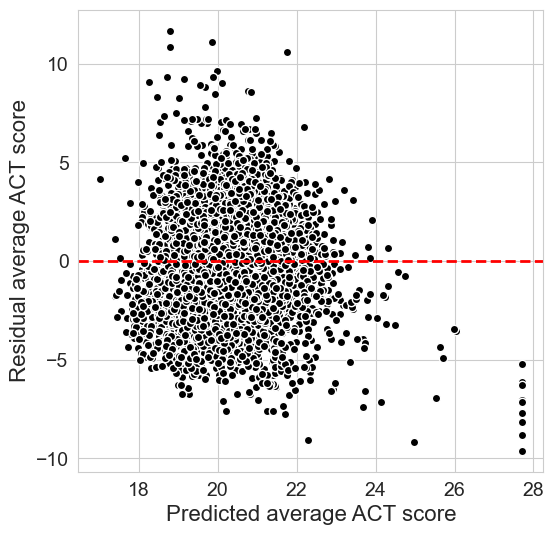

In [296]:
plt.figure(figsize=(6,6))

plt.plot(y_hat33, model_log.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [297]:
model_log.pvalues

const                0.000000e+00
log_unemployment    1.309872e-269
dtype: float64

In [298]:
mean_absolute_error(df["average_act"], model_log.predict())

1.784490576727166

In [299]:
mean_absolute_error(df["average_act"], model_log.predict())

1.784490576727166

In [300]:
mean_absolute_error(df["average_act"], model_rate_unemployment.predict())

1.7421893796735066

It was then evaluated if the log transformation of the variable rate_unemployment was appropriate. The p-values of the model were 0, meaning the model was statistically significant. The mean absolute error was 1.78, meaning the models predictions on average are off by 1.78 points. The mean absolute error of the transformed variable was then compared to the mean absolute error of the original model. The original mean absolute error was 1.74, which is not drastically different from the transformed model. 

In summary, the R-squared in the original model was higher and suggests the original model fit the data slightly better in terms of variance explained. The mean absolute error was not drastically different between the two models. The original model performed better at predicting average ACT score. However, the log-transformed model may be better at meeting the assumptions of linear regression. Because the project is focused on accurately predicting ACT scores, it was decided to keep the original model. 

## Percent of Parents that Attended College 
The variable for percent_college was then evaluated. The values were plotted and fit with a regression line. 

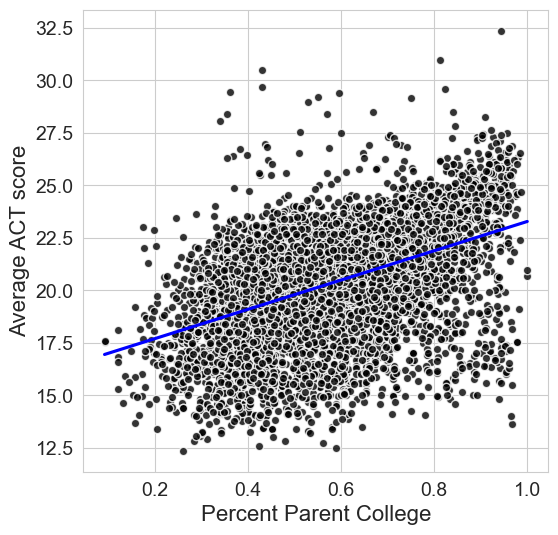

In [301]:
plt.figure(figsize=(6,6))
sns.regplot(data=df,
            x="percent_college",
            y="average_act",
            color="blue",
            ci=False,
            scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})
plt.xlabel("Percent Parent College", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [302]:
model_percent_college= smf.ols(formula="average_act ~ percent_college", data=df).fit()
print(model_percent_college.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1922.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:46   Log-Likelihood:                -16048.
No. Observations:                7227   AIC:                         3.210e+04
Df Residuals:                    7225   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3039      0.095    1

The R-squared for the model is 0.21. The variable has a p-value of 0 and is statistically significant. The coefficient for percent_college is 6.97. This means that for every one unit increase in the measure of percent_college, the average ACT score increases by 6.97. 

The RMSE and mean squared error was then calculated. The mean squared error was 2.23. This is relatively small and indicates we can use this model to predict average ACT scores.

In [303]:
y_hat4= model_percent_college.predict()

In [304]:
np.sqrt(mean_squared_error(df["average_act"], y_hat4)).round(3)

np.float64(2.229)

Lastly, the model fit for percent_college was evaluated using a graphical method an no discernable shape was observed. 

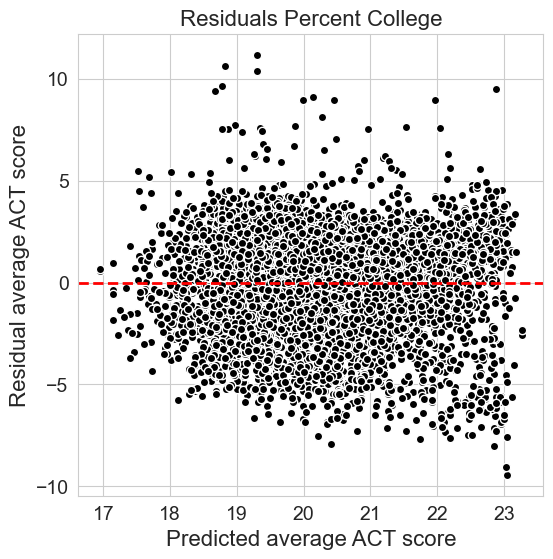

In [305]:

plt.figure(figsize=(6,6))
plt.plot(y_hat4, model_percent_college.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)
plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)
plt.title("Residuals Percent College", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

## Percent of Student with Married Parents
The variable for percent_married was then evaluated. The values were plotted and fit with a regression line. 

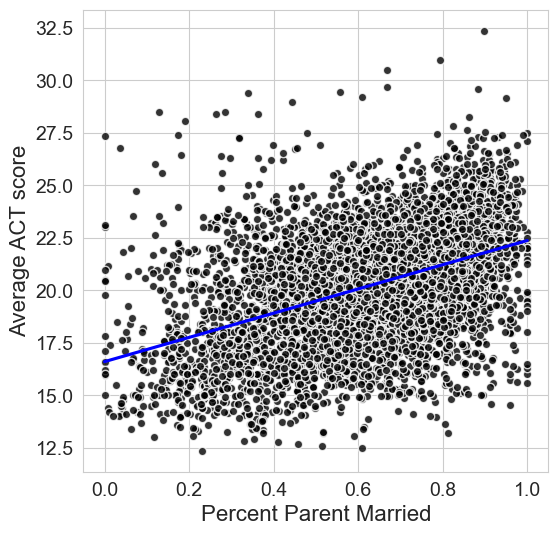

In [306]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x="percent_married",
            y="average_act",
            color="blue",
            ci=False,
            scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})
#Add axis labels
plt.xlabel("Percent Parent Married", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)

#Increase fontsize of tick labels

plt.tick_params(labelsize=14)

plt.show()

In [307]:
model_percent_married= smf.ols(formula="average_act ~ percent_married", data=df).fit()
print(model_percent_married.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1733.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:47   Log-Likelihood:                -16124.
No. Observations:                7227   AIC:                         3.225e+04
Df Residuals:                    7225   BIC:                         3.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6046      0.093    1

The R-squared is 0.19. It can be observed that the p-value is 0, which means the variable percent_married is statistically significant. The coefficient for the variable is 5.77, indicating a positive relationship between percent_married and average ACT. For every one unit increase in percent_married, the average ACT scores increases by 5.77.

The RMSE and mean squared error was then calculated. The mean squared error is 1.73, which is relatively small and means the ACT score can be predicted from this particular input variable. Lastly, the model fit was evaluated graphically.

In [308]:
y_hat5= model_percent_married.predict()

In [309]:
np.sqrt(mean_squared_error(df["average_act"], y_hat5)).round(3)

np.float64(2.253)

In [310]:
mean_absolute_error(df["average_act"], y_hat5)

1.7361820917022368

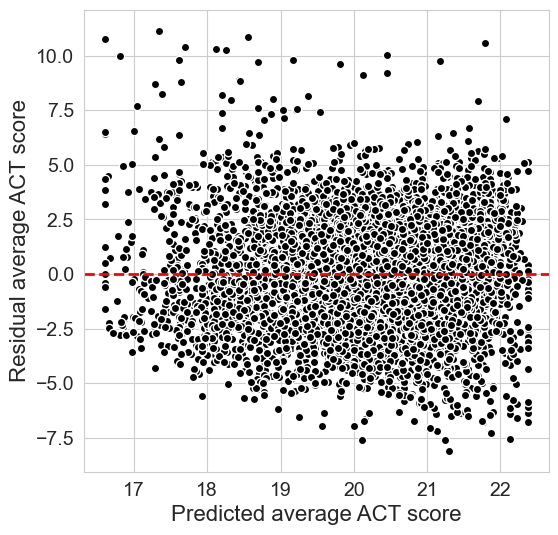

In [311]:
plt.figure(figsize=(6,6))

plt.plot(y_hat5, model_percent_married.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

## Median Income

A single input model using median income was evaluated.

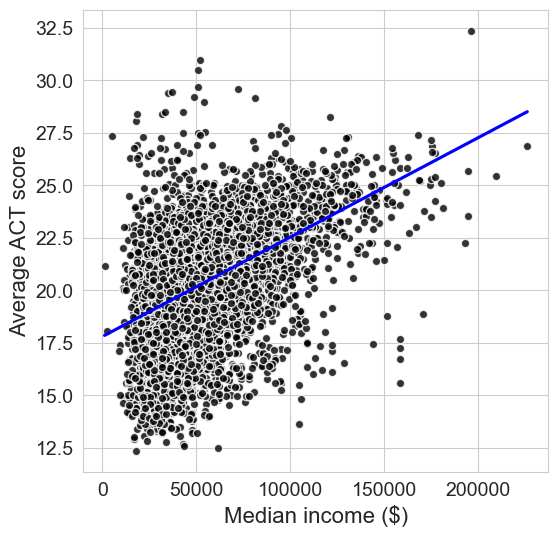

In [312]:
plt.figure(figsize=(6,6))
sns.regplot(data=df,
            x="median_income",
            y="average_act",
            color="blue",
            ci=False,
            scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})
plt.xlabel("Median income ($)", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [313]:
model_median_income= smf.ols(formula="average_act ~ median_income", data=df).fit()
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:48   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

In [314]:
y_hat1= model_median_income.predict()

In [315]:
np.sqrt(mean_squared_error(df["average_act"], y_hat1)).round(3)

np.float64(2.228)

In [316]:
mean_absolute_error(df["average_act"], y_hat1)

1.712938698068859

The coefficient for median income is statistically significant but is relatively small. This is because unlike other variables it is calculated in dollars and has a large range while the ACT score has a much smaller range. The R-squared value is 0.21, which is relatively small. The mean absolute error is 1.71, which is relatively small. Below, the model fit was evaluated graphically.

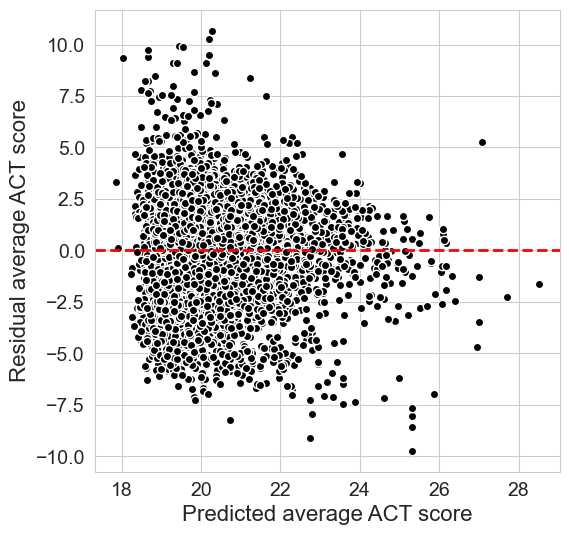

In [317]:
plt.figure(figsize=(6,6))
plt.plot(y_hat1, model_median_income.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)
plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

While looking at the residuals, they do not form a perfect cloud shape. Because of this, we will consider another model, such as a quadratic. This will be accomplished by establishing another model, model_median_income2 and adding a squared version of median income.

In [318]:
model_median_income2= smf.ols(
    formula="average_act ~ median_income + I(median_income**2)",
    data=df).fit()
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:48   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

The R-squared is now .22 which is slightly higher than the previous model. It should be noted that the p-value of the squared term I(median_income**2) is statistically significant. However, note that the magnitude of both coefficients is now almost 0. 

The model's significance was then assessed by viewing the p-values. The p-values were 0, which are significant. 

In [319]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

The model's accuracy was then assessed by computing the mean absolute error. 

In [320]:
mean_absolute_error(df["average_act"], model_median_income2.predict())

1.6972389257635827

In [321]:
mean_absolute_error(df["average_act"], model_median_income.predict())

1.712938698068859

The mean absolute error of the squared model is 1.70, which is smaller than the orignal model's mean absolute error of 1.71. Although it is smaller, it is not practically smaller. In summary, we were able to look at the relationship between median income and the average ACT score and then formulate a model that has some ability to predict what the ACT score is. It should be noted this is a relatively weak prediction. By comparing the two models we created for median income, it was concluded that using the quadratic model would not provide a better fit to predict average ACT scores.

## Regional Variables
A preliminary look at the the regional dummy variables was performed. THe code below generated a boxplot to show the distribution of average ACT scores by region. The Northeast region has the largest range of average ACT scores while the West has the shortest. 

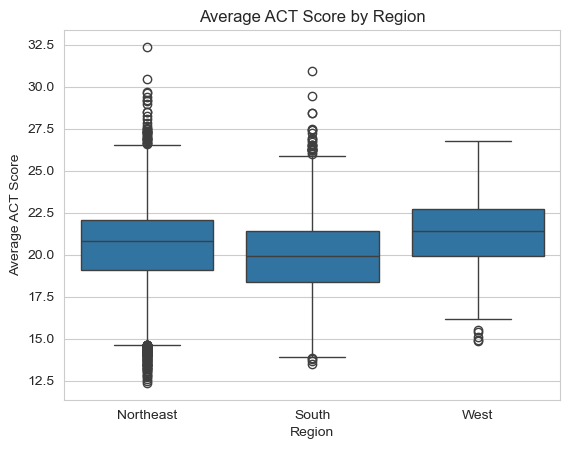

In [322]:
sns.boxplot(x='region', y='average_act', data=df)
plt.title('Average ACT Score by Region')
plt.xlabel('Region')
plt.ylabel('Average ACT Score')
plt.show()

# Multiple Linear Regression
After evaluating each predictor variable individually, the multiple regression model called model including all the predictor variables was created. Each of the five socioeconomic numeric predictors was included. The dummy variables region_Northeast and region_West were included. The variable region_South was excluded to avoid perfect multicollinearity.

In [323]:
model= smf.ols(
    formula= "average_act ~ rate_unemployment+percent_college+percent_married+median_income+percent_lunch+region_Northeast+region_West",
    data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1753.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:19:49   Log-Likelihood:                -13311.
No. Observations:                7227   AIC:                         2.664e+04
Df Residuals:                    7219   BIC:                         2.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7274      0.13

The R-squared in this model was 0.63, meaning the model explains about 63% of the variation in average ACT scores. This is a relatively high R-squared. The variables rate_unemployment, percent_college, percent_lunch, and the dummy variables are statistically significant. The variables rate_unemployment, percent_lunch, and region_Northeast are associated with lower average ACT scores. The variables percent_college and region_West are associated with higher average ACT scores. The variables percent_married and median_income are not statistically significant predictors in this model. 

A residual plot was then used for graphical assessment of the model's fit and to determine if the predictor variables have been used in the best way possible (or if there is a transformation that might improve the fit).

In [324]:
y_hat= model.predict()

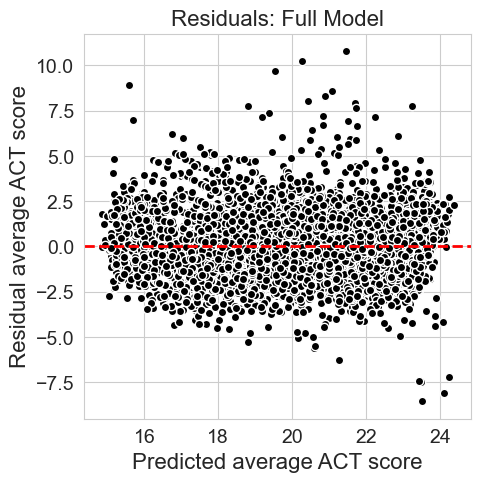

In [348]:
plt.figure(figsize=(5,5))

plt.plot(y_hat, model.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)
plt.title("Residuals: Full Model", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [328]:
mean_absolute_error(df["average_act"], model.predict())

1.1412621777999654

There is relatively no structure in the residual plot. The plot points are scattered in a cloud shape and do not skew to one side. This indicates that the model is unlikely to be improved by making transformations of the input variables in the model. A numerical assessment of the accuracy of the model was performed by computing the mean absolute error. The output was 1.14, indicating that on average the model's predictions of the average ACT score are off by 1.14 points. This model can be used to predict average ACT scores.

## Reduced Model
The project then fit a linear regression model using only the predictors with significant coefficients from the full model. This model is referred to as the reduced model. 

In [329]:
model_reduced =smf.ols(
    formula="average_act ~ rate_unemployment +percent_college+percent_lunch+region_Northeast+region_West", 
    data=df).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2454.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:41:48   Log-Likelihood:                -13312.
No. Observations:                7227   AIC:                         2.664e+04
Df Residuals:                    7221   BIC:                         2.668e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6489      0.10

The reduced model has a R-squared of 0.63, which was the same value in the full model. The reduced model also aligns with the full model in that an increase in the unemployment rate and students qualifying for free or reduced lunch are associated with lower average ACT scores. As the percent of parents that went to college increases, the average ACT scores increases. In comparison to the omitted baseline South region, in the Northeast scores are slightly lower and in the west scores are slightly higher. All the included variables remained statistically significant due the p-values being 0. Residuals were plotted to visually evaluate how well the reduced model fits the data.

In [330]:
y_hat= model_reduced.predict()

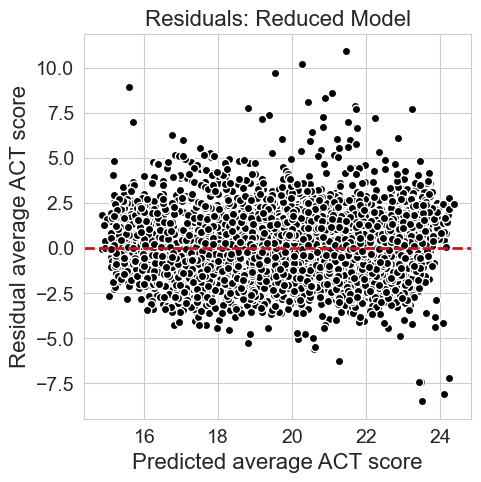

In [349]:
plt.figure(figsize=(5,5))

plt.plot(y_hat, model_reduced.resid, "ko", mec="w")
plt.axhline(0, color="r", linestyle="dashed", lw=2)

plt.xlabel("Predicted average ACT score", fontsize=16)
plt.ylabel("Residual average ACT score", fontsize=16)
plt.title("Residuals: Reduced Model", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The resulting residual plot displays a cloud-like shape, indicating that transformations are not necessary. The accuracy of the reduced and full models was then compared using Mean Absolute Error and R-squared. The results showed no meaningful difference in predictive accuracy or model fit between the two models, suggesting that the reduced model performs just as well while using fewer predictors.

In [334]:
mae_full = mean_absolute_error(df["average_act"], model.predict())
mae_reduced = mean_absolute_error(df["average_act"], model_reduced.predict())

r2_full= model.rsquared
r2_reduced= model_reduced.rsquared

pd.DataFrame({"Mean Absolute Error": [mae_full, mae_reduced],
              "R-squared": [r2_full, r2_reduced]},
             index=["full model", "reduced model"]).round(4)

,Mean Absolute Error,R-squared
full model,1.1413,0.6296
reduced model,1.1412,0.6296


Lastly, ANOVA was used to test whether the full model significantly improves fit compared to the reduced model. In the output below, row 0 represents the reduced model and row 1 represents the full model. The df_diff value of 2 indicates that the full model includes two additional predictors. The p-value of 0.448 (greater than 0.05) shows that the improvement in model fit is not statistically significant. This means that including the variables median income and percent of parents married does not meaningfully improve the model. The reduced model is preferable for predicting average ACT scores.

In [336]:
anova_lm(model_reduced, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7221.0,16842.540751,0.0,NaN,NaN,NaN
1,7219.0,16838.789963,2.0,3.750788,0.804005,0.447573


## Model with standardized predictors: scaling

The project then evaluated a model with standardized predictors. The numerical predictors were standardized to have a mean of 0 and standard deviation of 1 using StandardScaler(). This was done to compare the relative importance of predictors in the reduced model. Only the numerical predictor variables (rate_unemployment, percent_college, and percent_lunch) were included in this scaling process, and the regional dummy variables were excluded since they are already binary and do not require standardization. A list of these predictors was stored in predictor_variables, and a corresponding list of new column names was created with "_normalized" appended to differentiate between the original and standardized variables. The StandardScaler was fit to the original variables and used to transform them, with the resulting scaled values added to the data frame. Finally, summary statistics were computed to verify the transformation was successful.

In [338]:
predictor_variables= ["rate_unemployment", "percent_college", "percent_lunch"]

In [340]:
scaled_columns= [var+ "_normalized" for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [341]:
scaler= StandardScaler().fit(df[predictor_variables])

In [342]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

In [343]:
df[scaled_columns].agg(["mean", "std"]).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0


In [344]:
model_normalized = smf.ols(
    formula="average_act ~ rate_unemployment_normalized+percent_college_normalized+percent_lunch_normalized+region_Northeast+region_West",
    data=df).fit()
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2454.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:20:53   Log-Likelihood:                -13312.
No. Observations:                7227   AIC:                         2.664e+04
Df Residuals:                    7221   BIC:                         2.668e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

A multiple linear regression model was then fit with the normalized predictors and the regional dummy variables. The focus in this model was the coefficients and their magnitude. The variable percent_lunch has a coefficent of -1.78, which is a much larger magnitude than the other predictors in the model. This indicates that in the model, students qualifying for free or reduced lunch has the largest impact on average ACT scores, compared to other predictors. 

In [345]:
mae_normalized = mean_absolute_error(df["average_act"], model_normalized.predict())  
mae_reduced = mean_absolute_error(df["average_act"], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({"Mean Absolute Error": [mae_normalized, mae_reduced],
              "R-squared": [r2_normalized, r2_reduced]},
             index=["normalized model", "reduced model"]).round(4)

,Mean Absolute Error,R-squared
normalized model,1.1412,0.6296
reduced model,1.1412,0.6296


Finally, the Mean Absolute Error and R-squared were compared between the reduced model and the normalized model. The values are identical for both models, indicating that standardizing the numerical predictor variables does not affect the model’s overall fit or ability to predict average ACT scores. The only difference between the two models is in the interpretation of the coefficients. 

# Evaluation and Conclusion

The purpose of this project was to examine whether socioeconomic factors and regional differences influence educational opportunities in U.S. high schools, using average ACT scores as a measurable indicator of educational outcomes. Predictor variables included both numerical and categorical variables, such as unemployment rate, percent of adults who attended college, percent of students with married parents, median income, percent of students eligible for free or reduced-price lunch, and region. Both the response variable and predictors were measurable and contained a sufficient number of measurements for analysis.

One limitation in the data was the scope of geographic representation. The dataset included schools from only 20 states, which somewhat restricted the ability for a complete analysis of all US regions. Many rural and less densely populated states were excluded, limiting the model's ability to evaluate different types of socioeconomic locations. This is particularly relevant because rural poverty may differ significantly from urban poverty, potentially biasing the results.

The analysis produced quantitative results that helped evaluate the relationship between the predictors and average ACT scores. The model showed that unemployment rate, percent of parents with college education, and percent of students eligible for free or reduced lunch were statistically significant predictors. Regional variables were also significant but had a relatively small effect. Median income and percent of students with married parents were not significant contributors to the model.

The percent of students eligible for free or reduced-price lunch was the strongest predictor of average ACT scores. In contrast, median income was the weakest. This is likely because free and reduced lunch eligibility is a direct, school-level measure of economic disadvantage within schools. Median income is an area-level measurement that may include households without school-aged children and does not account for income distribution or cost of living. Therefore, free or reduced lunch percentage better captures the socioeconomic context directly affecting students, making it a stronger predictor in the model.

In conclusion, the project demonstrated that socioeconomic factors, especially the percentage of students eligible for free or reduced price lunch, are strong predictors of the average ACT score in U.S. high schools. The region of the high school has a small influence. While other factors like parental education and unemployment rate also showed significant relationships, variables such as median income and marital status of parents did not meaningfully improve the model. This suggests that school level measurements of student socioeconomic wellbeing are more effective at explaining academic outcomes than broader measurements. 